In [ ]:
# needs to be 580 x 1440
# lon: -180, 180
# lat: -60, 85

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
path = '/nfs/a68/earlacoa/population/count/v4.11/2010-2020'

In [17]:
pop_2010 = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/gpw_v4_population_count_rev11_2010_0.25deg_crop.nc')
pop_2015 = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/gpw_v4_population_count_rev11_2015_0.25deg_crop.nc')
pop_2020 = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/gpw_v4_population_count_rev11_2020_0.25deg_crop.nc')

In [18]:
pop_2010 = pop_2010.expand_dims(time=pd.date_range("2010", periods=1, freq='Y'))
pop_2015 = pop_2015.expand_dims(time=pd.date_range("2015", periods=1, freq='Y'))
pop_2020 = pop_2020.expand_dims(time=pd.date_range("2020", periods=1, freq='Y'))

In [22]:
pop = xr.concat([pop_2010, pop_2015, pop_2020], dim='time')

In [29]:
for year in range(2011, 2020):
    year = str(year)
    if year != '2015':
        pop.interp(time=year).to_netcdf(f'{path}/gpw_v4_population_count_rev11_{year}_0.25deg_crop.nc')

6,827,686,684.161443
6,827,970,073.639403
6,931,407,233.094596
7,035,127,782.027743
7,138,564,941.482936
7,345,155,870.915361
7,345,506,660.02964
7,473,895,475.855187
7,601,933,502.566458
7,729,971,529.277724
7,986,047,582.70026


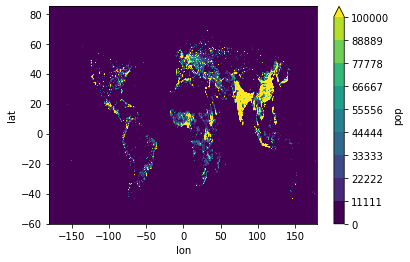

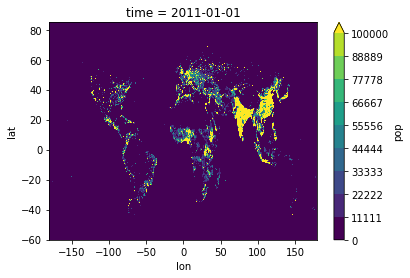

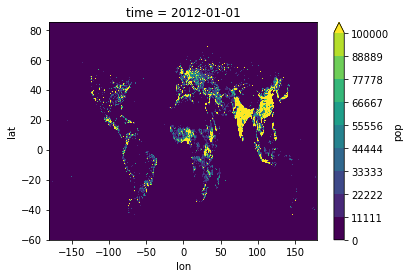

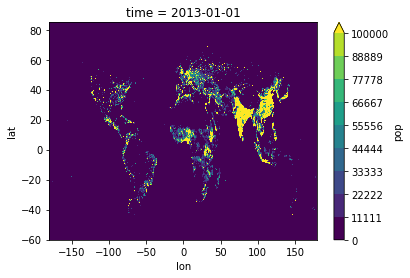

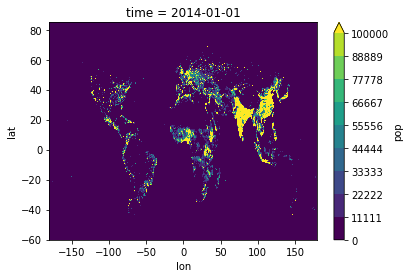

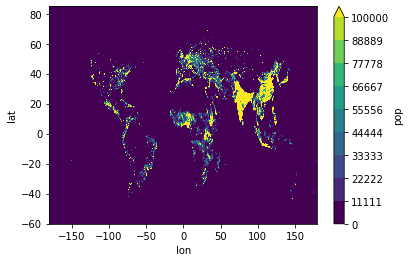

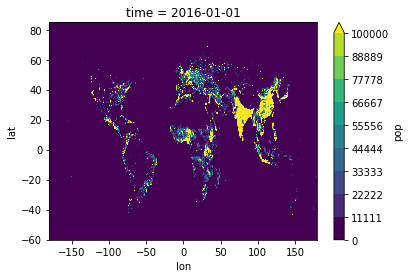

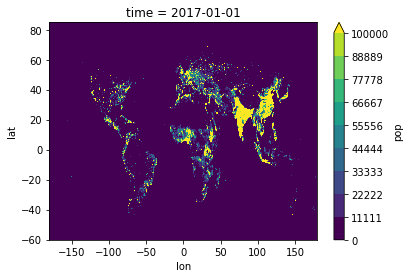

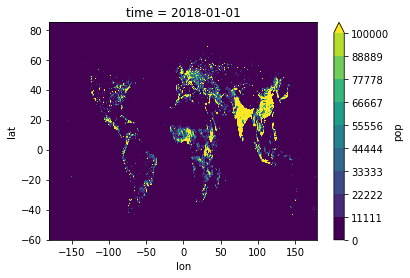

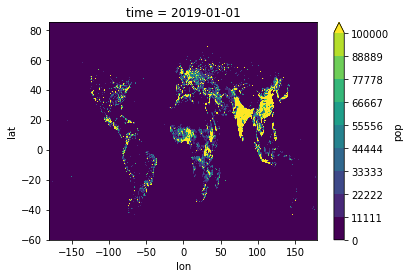

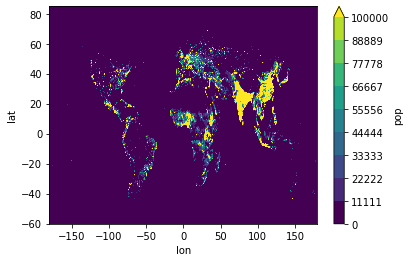

In [58]:
for year in range(2010, 2021):
    year = str(year)
    with xr.open_dataset(f'{path}/gpw_v4_population_count_rev11_{year}_0.25deg_crop.nc') as ds:
        print(f'{ds.pop.sum().values:,}')
        fig = plt.figure();
        ds.pop.plot(levels=np.linspace(0, 100_000, 10));

In [60]:
ds = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/GBD2019_population_2010_0.25deg.nc')

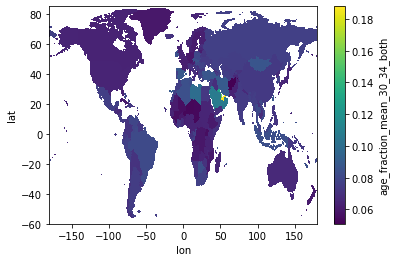

In [61]:
ds['age_fraction_mean_30_34_both'].plot()

In [62]:
ds = xr.open_dataset('/nfs/a68/earlacoa/population/count/v4.11/2010-2020/GBD2019_baseline_mortality_mort_ncd_both_mean_2010_0.25deg.nc')
ds

<xarray.Dataset>
Dimensions:                     (lat: 580, lon: 1440)
Coordinates:
  * lat                         (lat) float64 -59.88 -59.62 ... 84.62 84.88
  * lon                         (lon) float64 -179.9 -179.6 ... 179.6 179.9
Data variables:
    i_mort_ncd_both_mean_25_29  (lat, lon) float64 ...
    i_mort_ncd_both_mean_30_34  (lat, lon) float64 ...
    i_mort_ncd_both_mean_35_39  (lat, lon) float64 ...
    i_mort_ncd_both_mean_40_44  (lat, lon) float64 ...
    i_mort_ncd_both_mean_45_49  (lat, lon) float64 ...
    i_mort_ncd_both_mean_50_54  (lat, lon) float64 ...
    i_mort_ncd_both_mean_55_59  (lat, lon) float64 ...
    i_mort_ncd_both_mean_60_64  (lat, lon) float64 ...
    i_mort_ncd_both_mean_65_69  (lat, lon) float64 ...
    i_mort_ncd_both_mean_70_74  (lat, lon) float64 ...
    i_mort_ncd_both_mean_75_79  (lat, lon) float64 ...
    i_mort_ncd_both_mean_80up   (lat, lon) float64 ...

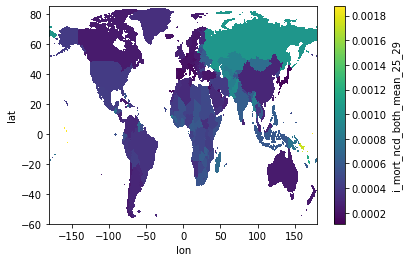

In [63]:
ds['i_mort_ncd_both_mean_25_29'].plot()